**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Steven Dominic Sahar
- Mengyi Chen
- Pranav Rebala
- Sikai Liang
- Jiaheng Dai

# Research Question

What is the correlation between the number of programming languages an individual possesses and the median salary of software engineers in the United States?

## Background and Prior Work

The COVID-19 pandemic has brought significant upheaval to various sectors in the United States, notably impacting industries like hospitality, travel, and retail. These sectors have faced considerable challenges, including job losses and reduced salaries 

1) In contrast, the digital transformation accelerated by the pandemic has led to a surge in demand for software development professionals. This shift is driven by companies investing heavily in technology to adapt to new consumer behaviors, such as increased online shopping and remote working 

2) According to CompTIA's February 2022 Tech Jobs Report, the average annual salary for an IT professional in the United States was $110,765 

3) This has prompted many job seekers and university students to pivot or choose majors focused on software and programming, aiming for stable employment and income. 
However, a gap exists in the understanding of how proficiency in multiple programming languages influences employment opportunities and salary scales. While existing studies have largely focused on the demand for popular individual languages based on company needs 

4) they often overlook the combined value of knowing multiple languages. 
Our research aims to bridge this gap by analyzing how the number of programming languages one is proficient in correlates with their salary progression in the software engineering field. Such insights are expected to provide valuable insights for individuals seeking to enhance their career prospects in this competitive job market.

References
1. Ansell, Ryan (June 2021) COVID-19 ends longest employment recovery and expansion in CES history, causing unprecedented job losses in 2020 
https://www.bls.gov/opub/mlr/2021/article/covid-19-ends-longest-employment-expansion-in-ces-history.htm <br>
2. Owen Hughes (March 2022) Developer jobs and programming languages: What's hot and what's next
https://www.zdnet.com/article/developer-jobs-and-programming-languages-whats-hot-and-whats-next/ <br>
3. Emily Matzelle (April 2022) T Salaries: Where the Money’s At
https://www.comptia.org/blog/it-salaries <br>
4. 4daysweek.io (April 2023)What are the Highest Paying Programming Languages in 2023?
https://4dayweek.io/salary/highest-paying-programming-languages <br>



# Hypothesis


We hypothesize that there is a significant positive correlation between the number of programming languages a software engineer is proficient in and their median salary in the United States, with a notably steep increase in salary observed as the number of tools increases until 5. Beyond this threshold, we anticipate a gradual diminishment in the rate of salary increase.

# Data

## Data overview

For each dataset include the following information

- Dataset #1
- Dataset Name: 2023 Stack Overflow Developer Survey 
- Link to the dataset: https://insights.stackoverflow.com/survey
- Number of observations: 89184
- Number of variables: 79


The dataset consists of survey results from over 90,000 developers in the year 2023. The independent variable is the number of programming languages a developer is proficient in (which could be extracted from the column “LanguageHaveWorkedWith”) and the dependent variable is the expected annual salary (from “ConvertedSumYearly”). The independent variable is originally presented as lists of languages, which we seek to convert to numeric values through one hot encoding. The dependent variable is given as numerical values. We need to remove irrelevant columns, filter out entries that miss information in important variables, and keep only professional developers based on the column “MainBranch”.


## Dataset

In [2]:
# Loading the survey results file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option("display.max_columns", 15)

survey = pd.read_csv('survey_results_public.csv')
survey.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,...,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,...,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,...,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,...,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,...,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
# Removing unnecessary columns and only keeping the salary and programming languages known
# Removing missing data from our columns

filtered_survey = survey[survey['MainBranch']=='I am a developer by profession']
data = filtered_survey[['ConvertedCompYearly', 'LanguageHaveWorkedWith']]
data = data.rename({'ConvertedCompYearly': 'Salary', 'LanguageHaveWorkedWith': 'Languages'}, axis=1)
data = data.dropna().reset_index(drop=True)
data['Languages'] = data['Languages'].str.split(';')
data.head()

,Salary,Languages
0,285000.0,"[HTML/CSS, JavaScript, Python]"
1,250000.0,"[Bash/Shell (all shells), Go]"
2,156000.0,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
3,23456.0,"[HTML/CSS, JavaScript, TypeScript]"
4,96828.0,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."


In [5]:
# One hot encoding the programming languages and finding the total languages known for every response

languages = pd.get_dummies(data['Languages'].apply(pd.Series).stack()).groupby(level=0).sum()
data['Total_Languages'] = languages.sum(axis=1)
data = pd.concat([data, languages], axis=1).drop(columns=['Languages'])
data.head()

,Salary,Total_Languages,APL,Ada,Apex,Assembly,Bash/Shell (all shells),...,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zig
0,285000.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0
1,250000.0,2,0,0,0,0,1,...,0,0,0,0,0,0,0
2,156000.0,7,0,0,0,0,1,...,0,0,0,1,0,0,0
3,23456.0,3,0,0,0,0,0,...,0,0,0,1,0,0,0
4,96828.0,6,0,0,0,0,1,...,0,0,0,1,0,0,0


The original data was not clean or tidy because there were some missing values for salary and programming languages known which we decided to discard because they wouldn't be helpful for our analysis. In addition, all of the programming languages were stored as a string together in one column rather than separately. Therefore we had to split the string into multiple columns and one hot encode the programming languages so it is easier to determine what languages every person knows. For preprocessing we found the total languages that every person knows by summing over all of the one hot encoded columns. This is because our analysis deals with the association between number of languages and salary so we needed to have those columns.

# Results

## Exploratory Data Analysis



In [6]:
data.shape

(44245, 53)

### None-graphic Analysis

In [7]:
description = data.describe() 
language_counts = data.iloc[:, 2:].sum() 
description

,Salary,Total_Languages,APL,Ada,Apex,Assembly,Bash/Shell (all shells),...,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zig
count,4.424500e+04,44245.000000,44245.000000,44245.000000,44245.000000,44245.000000,44245.000000,...,44245.000000,44245.000000,44245.000000,44245.000000,44245.000000,44245.000000,44245.000000
mean,1.036221e+05,5.178144,0.001085,0.005063,0.006080,0.031755,0.338999,...,0.033925,0.011888,0.049203,0.450831,0.027935,0.037790,0.005899
std,7.041697e+05,2.885067,0.032920,0.070973,0.077736,0.175349,0.473375,...,0.181038,0.108385,0.216295,0.497582,0.164790,0.190689,0.076579
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.446700e+04,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.496300e+04,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.225000e+05,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.435143e+07,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
language_counts.head()

APL                           48
Ada                          224
Apex                         269
Assembly                    1405
Bash/Shell (all shells)    14999
dtype: int64

1. Salary Insights:

    The average salary among the respondents is approximately \\$103,622.10.   
    There's a significant variation in the salary data, indicated by the
large standard deviation of approximately 704,169.70. This could be
due to a wide range of roles, geographical locations, and experience
levels. The salary range is extremely broad, starting as low as \\$1 to a
maximum of over \\$74 million.



2. Programming Language Familiarity:

    On average, respondents are familiar with about 5.18 programming
languages, reflecting a diverse skill set in the tech field. The range
of known languages per respondent varies significantly, from a minimum
of 1 to a maximum of 51. 


3. Usage of Different Languages:

    Popular languages like HTML/CSS and JavaScript show high usage, with
23,137 and 29,090 respondents respectively, confirming their widespread
application in the industry. Python is also notably popular, used by
19,229 respondents, which aligns with its growing demand in various
domains like data science and web development.
Languages like C++, Java, and SQL are also widely used, with thousands
of respondents familiar with them.
In contrast, languages like APL, Ada, and Zig have much lower usage
rates.

    

### Univariate Analysis of Salary

This part is going analyze the distribution of the Salary variable.

In [9]:
plt.figure(figsize=(8, 6))
fig = px.box(data['Salary'])
fig.update_layout(title='Box Plot of Salary', xaxis_title='Salary', yaxis_title='Salary Amount')
fig.show()

<Figure size 800x600 with 0 Axes>

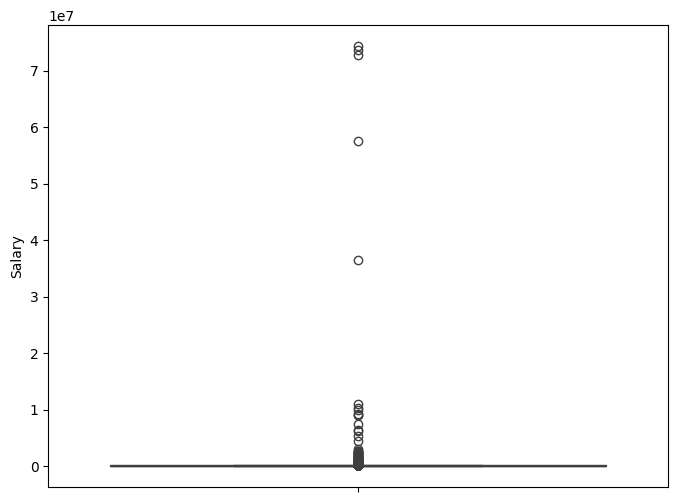

In [40]:
plt.figure(figsize=(8, 6))
fig = sns.boxplot(data['Salary'])
plt.show()

Based on the graph above, we obtain the following values:
- q1: \$44,467
- q2: \$74,963
- q3: \$122,518.8
- upper fence: \$239,587
- lower fence: \$1

We are going to use the upper fence and lower fence to get rid of the outlier values.

In [10]:
data_no_outlier = data[(data['Salary'] >= 1) & (data['Salary'] <= 239587)]
data_no_outlier.head()

,Salary,Total_Languages,APL,Ada,Apex,Assembly,Bash/Shell (all shells),...,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zig
2,156000.0,7,0,0,0,0,1,...,0,0,0,1,0,0,0
3,23456.0,3,0,0,0,0,0,...,0,0,0,1,0,0,0
4,96828.0,6,0,0,0,0,1,...,0,0,0,1,0,0,0
5,135000.0,15,0,1,0,0,0,...,1,0,1,1,0,0,1
6,80000.0,7,0,0,0,0,0,...,0,0,0,1,0,0,0


In [11]:
data_no_outlier.shape

(42220, 53)

Now that we got rid of the outlier salaries, we are going to plot the distribution of the salaries.

Text(0, 0.5, 'Density')

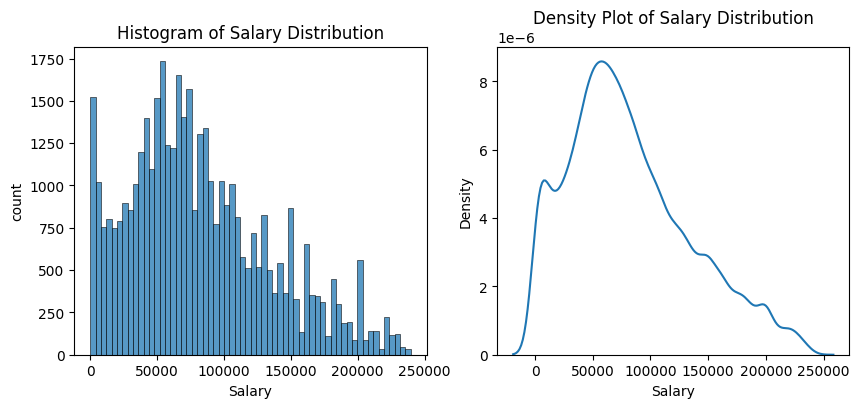

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data_no_outlier['Salary'], ax=ax[0], kde=False)
ax[0].set_title("Histogram of Salary Distribution")
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('count')

sns.kdeplot(data_no_outlier['Salary'], ax=ax[1])
ax[1].set_title("Density Plot of Salary Distribution")
ax[1].set_xlabel('Salary')
ax[1].set_ylabel('Density')

From the graphs above, we can see that Salary have a shape similar to normal distribution, but is also right-skewed. This suggests that most individuals have salaries that are on the lower bracket, which makes total sense.

### Univariate Analysis of Languages

We are going to use the DataFrame `data_no_outlier` from before which got rid of the outliers.

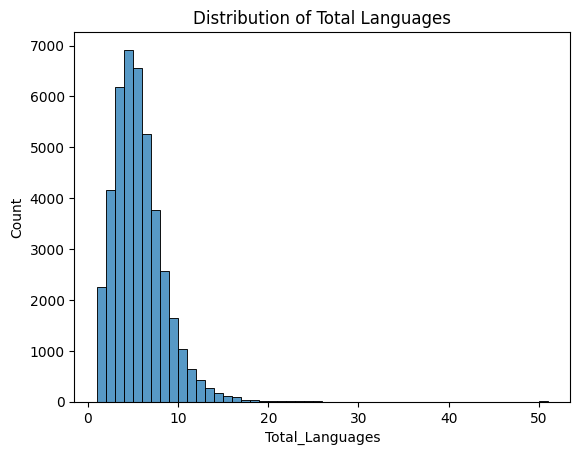

In [53]:
sns.histplot(data=data_no_outlier, x='Total_Languages', bins=50)
plt.title('Distribution of Total Languages')
plt.show()

The graph above is right skewed. However, if we got rid of the outliers, the graph would be roughly normally distributed. Based on the graph, the average number of languages an individual have worked with is 4. This suggests that most individuals have worked with lower number of programming languages which makes total sense as different positions require only several programming languages.

In [42]:
Total_Languages_Count = data_no_outlier['Total_Languages'].value_counts()
Total_Languages_Count.head()

Total_Languages
4    6922
5    6562
3    6186
6    5258
2    4154
Name: count, dtype: int64

Let's remove the number of total languages that have count < 10.

In [43]:
Total_Languages_Count = Total_Languages_Count[Total_Languages_Count >= 10]
Total_Languages_Count.head()

Total_Languages
4    6922
5    6562
3    6186
6    5258
2    4154
Name: count, dtype: int64

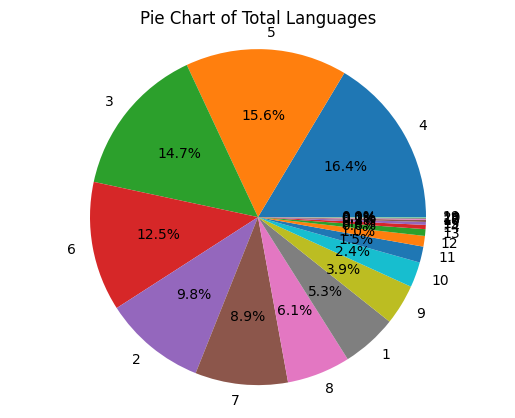

In [54]:
plt.pie(Total_Languages_Count, labels=Total_Languages_Count.index, autopct='%1.1f%%')
plt.title('Pie Chart of Total Languages')
plt.axis('equal')
plt.show()

## Analysis of Users per Language

This part will analyze the percentage of users for each language.

In [17]:
userProportions = pd.DataFrame(languages.mean()*100).reset_index()
userProportions.columns = ['Language', 'Percentage']
userProportions = userProportions.sort_values('Percentage', ascending=False).reset_index(drop=True)
userProportions.head()

,Language,Percentage
0,JavaScript,65.747542
1,HTML/CSS,52.292914
2,SQL,52.116623
3,TypeScript,45.083060
4,Python,43.460278


We can plot the percent of individuals who know the 10 most and least popular languages to determine the distribution of users across languages.

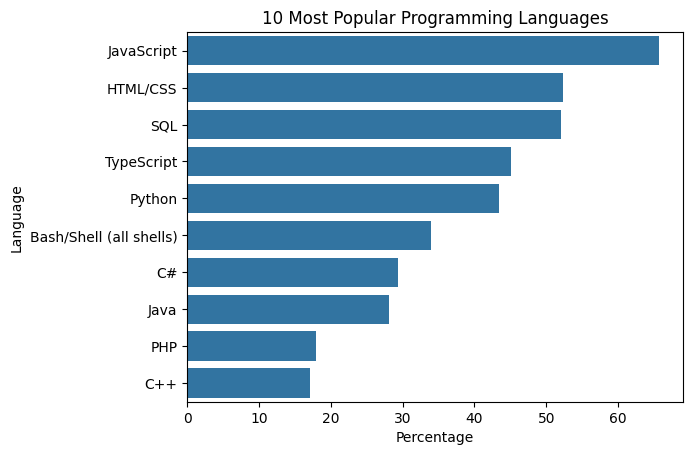

In [46]:
color = sns.color_palette()[0]
sns.barplot(data=userProportions[:10], y='Language', x='Percentage', color=color)
plt.title('10 Most Popular Programming Languages')
plt.show()

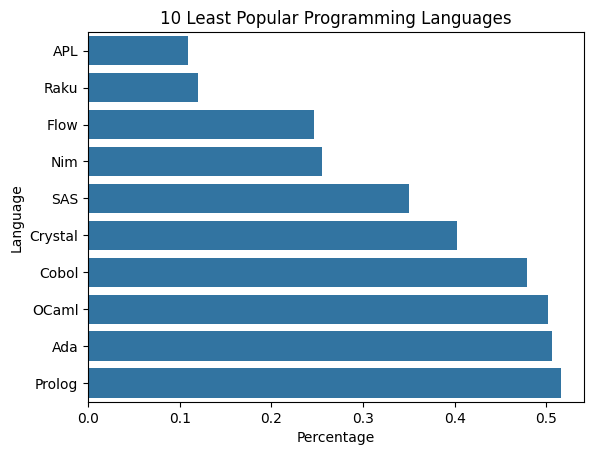

In [47]:
sns.barplot(data=userProportions.sort_values('Percentage')[:10], y='Language', x='Percentage', color=color)
plt.title('10 Least Popular Programming Languages')
plt.show()

The most popular language is JavaScript with about 65% of respondents say they know it followed by HTML/CSS and SQL. The least popular language is APL with only 0.1% of individuals knowing it, followed by Raku and Flow.

In [20]:
topNames = (userProportions[:15]['Language']).to_numpy()
topLanguages = languages[topNames]
topLanguages.head()

,JavaScript,HTML/CSS,SQL,TypeScript,Python,Bash/Shell (all shells),C#,Java,PHP,C++,Go,PowerShell,C,Rust,Kotlin
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0


Looking at the most popular languages, we can see that there might be a high correlation between knowing certain languages like JavaScript and HTML/CSS since they are used together frequently. We can plot the correlations of the top 15 languages to look at which ones are highly correlated.

<Figure size 1000x1000 with 0 Axes>

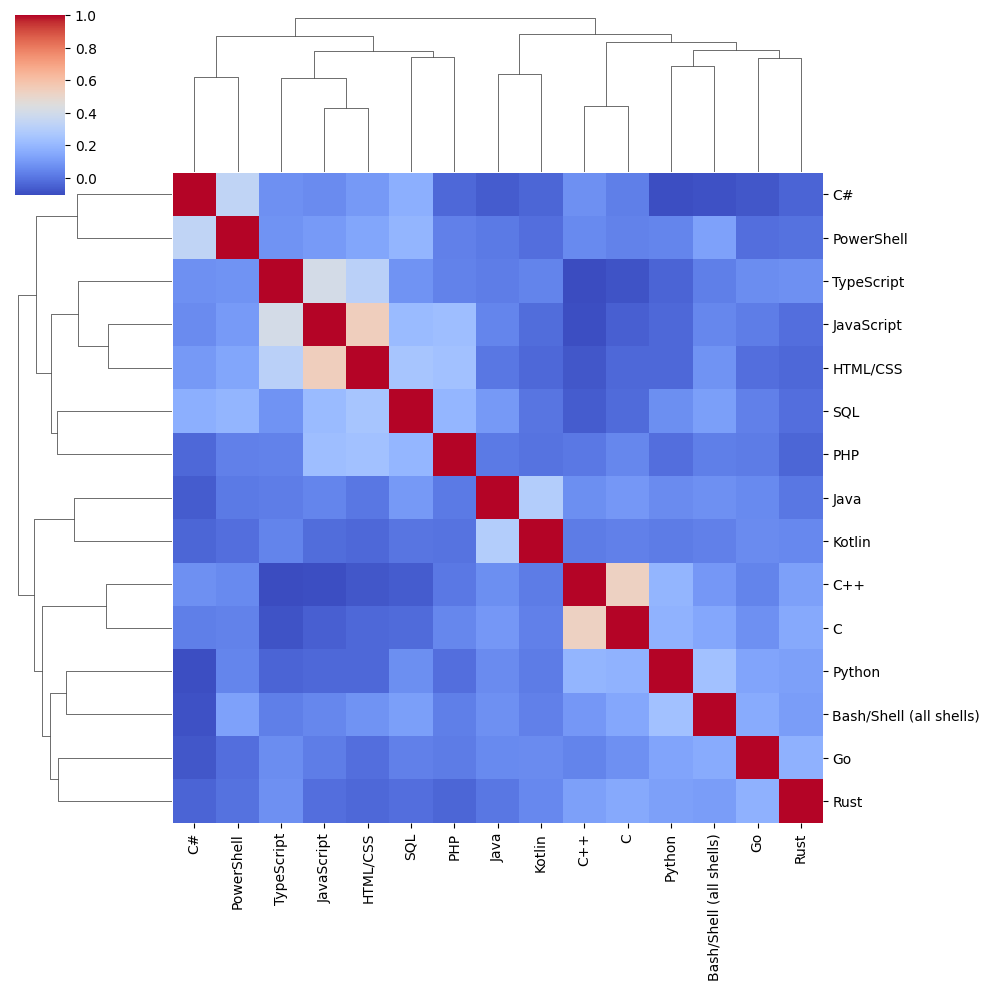

In [31]:
correlation_matrix = topLanguages.corr()
plt.figure(figsize=(10, 10))
sns.clustermap(correlation_matrix, cmap="coolwarm")
plt.show()

Using the cluster map, we can see that certain groups of languages are likely to be known together, like JavaScript and HTML/CSS, C++ and C, or Java and Kotlin. These groupings make sense because it is likely that people would learn these languages and use them together.

### Language count and median salary


In [22]:
Total_Languages_Count.index

Index([4, 5, 3, 6, 2, 7, 8, 1, 9, 10, 11, 12, 13, 14, 15, 16, 18, 17, 20, 19], dtype='int64', name='Total_Languages')

We first create a scatter plot to get an idea of how the number of the software engineers possessing each language and their median salaries look like.

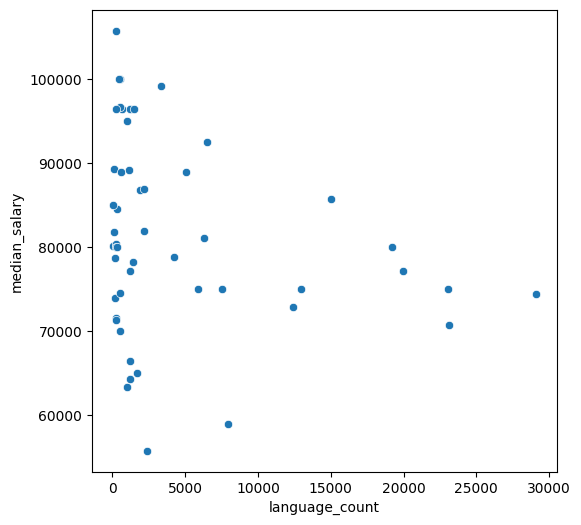

In [35]:
data1 = []#create a empty list

for program_language in data.columns[2:]:#selecting the columns starting from the column with index 2, in this case, the specific language starts from index 2.
    each_language_count = data[program_language].sum()#number counts for each language
    median_salary = data[data[program_language] == 1]['Salary'].median()#median salary for each language, the reason for '==1' is due to we have implemented one-hold encoding to the existing dataset, '==1' indicates the people that have used the specific languages.
    data1.append([program_language, each_language_count, median_salary])
df1 = pd.DataFrame(data1, columns=['Languages', 'language_count', 'median_salary'])#create a dataframe for plotting.

plt.figure(figsize=(6, 6))
sns.scatterplot(x='language_count', y='median_salary', data=df1)
plt.show()

In [24]:
medians = {}
for l in Total_Languages_Count.index:
    selected_lines = data_no_outlier[data_no_outlier['Total_Languages']==l]
    median_salary = selected_lines['Salary'].median()
    medians[l] = median_salary

We calculate the median salary for each number of total languages possessed, and store the information in a dictionary called medians.

We then visualize the relationship between median salariy and total languages by a line plot.

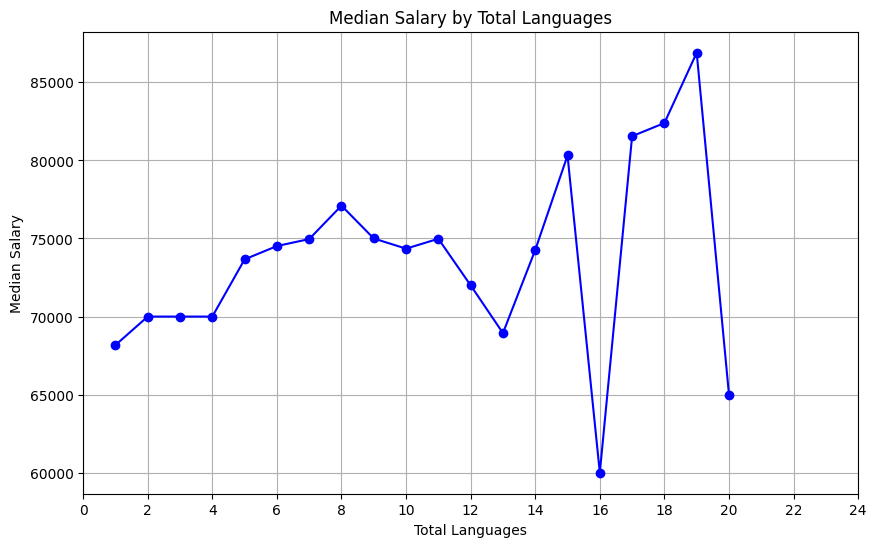

In [25]:
medians_df = pd.DataFrame(list(medians.items()), columns=['Total_Languages', 'Median_Salary'])
medians_df = medians_df.sort_values(by='Total_Languages')
plt.figure(figsize=(10, 6))
plt.plot(medians_df['Total_Languages'], medians_df['Median_Salary'], marker='o', linestyle='-', color='b')
plt.title('Median Salary by Total Languages')
plt.xlabel('Total Languages')
plt.ylabel('Median Salary')
plt.xticks(np.arange(0,25,step=2))
plt.grid(True)
plt.show()

From the graph, we could observe a rising trend in median salary overall as total languages possessed increases. The increase is most significant when the total languages increase from 4 to 5. After the number of languages get pass 10, there is significant fluctuation in the median salary, which might be attributed to the lack of samples (not a lot of software engineers possess so many languages).


# Ethics & Privacy

Based on our proposed data, there might be biases in terms of the work type, nationality(country), age, educational background, and coding activities. In terms of the wording, I do not think there are biases due to the author of the survey composing it into formulated options instead of free response type of questions. This eliminates the possibility of respondents being misguided by the wording of the terms. However, some variables are more likely to be inherently forcing on specific demographic groups, for instance, in terms of the nationality, people that are from countries(U.S., European nations, India.etc..) with a relatively stronger programming atmosphere and are more engaged with the western countries are more concentrated in this dataset, while people that are from other countries might be overlooked, and biased correlation might be established based on this issue. Moreover, in terms of educational background, people might not be willing to report their actual background due to stereotypical perspective of the society regarding this matter, meaning that people with relatively lower educational background might fabricate their answers when answering to this question. The same issue might also apply to salaries. People might exaggerate the numbers to achieve a better perceived social status, which is a tendency due to social perspective. In regard to privacy, there is no sensitive data on the dataset, and people were given the option to not answer specific questions if they do not feel comfortable, so privacy leak is not a concern. To detect the bias before the analysis, we would try to thoroughly understand the data by examining the demographics from the dataset(e.g. nationality) and computing descriptive statistics. During analysis, we would conduct exploratory data analysis to visualize the distribution of variables across the different demographic groups and plot different graphs such as histograms and box plots to identify disparities and outliers. Furthermore, we could apply statistical tests to identify the statistical differences between demographic groups(e.g. nationality). Lastly, when communicating the analysis, we would ensure to clearly document the sources of our data, the preprocessing actions taken, and the different methodologies used to address the biases identified. We would also convey the limitations of our analysis by acknowledging the presence of inherent biases to provide a comprehensive understanding of the results and their potential constraints in our final report.


# Team Expectations 

Weekly Meetings: Our team is going to have at least one synchronous meeting every week. The day and time of the meeting will be discussed a week prior and is adjusted based on each member's availability. If any time conflicts arise, one should inform the team at least 6 hours before the meeting. After the meeting ends, the team will communicate important details and receive progress updates from the missing team member through Discord as necessary.
Communication: Our team will be using Discord as our medium of communication - chat for asynchronous communication and voice channels to host our synchronous meetings. Our team is going to provide continuous progress updates and any blockages throughout the week leading up to the weekly meeting to ensure the goals for the week are met. 
Task Distribution: We acknowledge that uneven task distribution is inevitable, but our group will try our best to ensure each member contributes equally throughout the entire project. We would achieve this by listing all the tasks to be completed for the week and sharing it accordingly. Since each member has different strengths and interests, we would open up the floor for each member to pick the tasks they desire, and discuss amongst ourselves if one task is selected by multiple members. We will try to get two people working on a single task when possible to help smoothen the workflow. 
Task Submission: Before submitting any project checkpoints, each member will read through the project submission to ensure that we understand the content of the submission, check insufficient code and proofread any texts for grammar and completeness.
Conflict Resolution: If any conflict arises, we would try to resolve it amongst ourselves by discussing it. However, if we are not able to resolve it, we would seek the help of a TA and the professor to mediate the problem.


# Individual Responsibilities:

* *Steven Dominic Sahar: Descriptive Analysis, Data Exploration, Data Visualization, Data Analysis*
* *Mengyi Chen: Data Wrangling & Cleaning, Data Visualization, Finalize EDA* 
* *Pranav Rebala: Obtaining Dataset, Descriptive Analysis, Data Exploration, Data Analysis*
* *Sikai Liang: Data Wrangling & Cleaning, Descriptive Analysis, Data Exploration, Data Visualization, Finalize EDA*
* *Jiaheng Dai: Data Wrangling & Cleaning, Data Visualization, Data Analysis*
* *All Members: Finalize Data Analysis, Finalize Report, Create Video, Proof Read Entire Project*

# Project Timeline Proposal





| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/1  |  6 PM | Search for datasets (completed)  | Finalize Proposal; Discuss Wrangling and possible analytical approaches (Asynchronous) | 
| 11/8  |  6 PM |  Import & Wrangle Data (Jiaheng, Sikai, Mengyi Chen); Begin EDA (Sikai, Pranav Rebala, Steven Dominic Sahar) | Review/Edit wrangling/EDA | 
| 11/14  | 6 PM  | EDA (Mengyi Chen, Steven Dominic Sahar, Jiaheng, Sikai, Steven Dominic Sahar)  | Discuss Analysis plan; Complete checkpoint 1   |
| 11/22  | 6 PM  | Finalize EDA (Mengyi Chen, Sikai); Begin Analysis (Jiaheng, Pranav Rebala, Steven Dominic Sahar) | Discuss/edit Analysis  |
| 11/28  | 6 PM  | Finalize Analysis (Sikai, Jiaheng, Steven Dominic Sahar, Mengyi Chen, Pranav Rebala) | Complete checkpoint 2; Complete results/conclusion/discussion |
| 12/4  | 6 PM  | Finalize report (Sikai, Jiaheng, Steven Dominic Sahar, Mengyi Chen, Pranav Rebala)| Discuss/edit full project |
| 12/9  | 6 PM  | Create video (Sikai, Jiaheng, Steven Dominic Sahar, Mengyi Chen, Pranav Rebala)| Final Check |
| 12/13  | Before 11:59 PM  | Final Check (Sikai, Jiaheng, Steven Dominic Sahar, Mengyi Chen, Pranav Rebala) | Turn in Final Project & Group Project Surveys |